In [1]:
import pandas as pd
import numpy as np
import keras

from sklearn.model_selection import train_test_split
#i#mport imblearn
#from imblearn.over_sampling import SMOTE
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Input
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras_tuner as k
from hyperopt import fmin, tpe, Trials
from keras import Sequential
from keras.layers import Dense
#pip install keras-tuner --upgrade
#pip install hyperopt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from mlxtend.plotting  import plot_decision_regions 

Using TensorFlow backend


In [2]:
df=pd.read_csv("4.linearsep.csv",header=None)

In [4]:
df.shape

(100, 3)

In [5]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [6]:
x=df.iloc[0:,:2]

In [7]:
y=df.iloc[0:,2]

In [8]:
x

,0,1
0,-0.177497,0.930496
1,1.977424,1.766155
2,1.800024,1.700343
3,-0.770837,2.359163
4,-0.308009,1.594063
...,...,...
95,2.632382,1.271305
96,-0.040256,1.782708
97,-0.787453,1.400357
98,2.702441,1.587444


In [9]:
df.duplicated().sum()

0

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [11]:
x_train.value_counts().sum()

90

In [12]:
y_train.value_counts()

1.0    46
0.0    44
Name: 2, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [14]:
trials = Trials()

In [15]:
from keras.regularizers import L1,L2,L1L2

In [35]:
def modellss(hp):
    model=Sequential()
    model.add(Input(shape=(2,)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=10),activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),kernel_initializer="he_normal"))

                    
                
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
    return model

In [36]:
tuner=k.RandomSearch(modellss,objective="val_accuracy",max_trials=25,directory="C:\\Users\\admin\\main\\folder4",project_name="f2")

In [37]:
tuner.search(x_trainp,y_train,epochs=100,validation_data=(x_test,y_test))

Trial 25 Complete [00h 00m 12s]
val_accuracy: 0.8999999761581421

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 04m 32s


In [38]:
tuner.results_summary()

Results summary
Results in C:\Users\admin\main\folder4\f2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 9
neurons1: 1
neurons2: 9
neurons3: 2
neurons4: 1
neurons5: 1
neurons6: 1
neurons7: 1
neurons8: 1
Score: 1.0

Trial 01 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 5
neurons1: 3
neurons2: 5
neurons3: 6
neurons4: 6
neurons5: 10
neurons6: 1
neurons7: 2
neurons8: 9
neurons9: 1
Score: 1.0

Trial 04 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 1
neurons1: 7
neurons2: 9
neurons3: 6
neurons4: 9
neurons5: 1
neurons6: 1
neurons7: 5
neurons8: 8
neurons9: 9
Score: 1.0

Trial 05 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 1
neurons1: 4
neurons2: 2
neurons3: 10
neurons4: 2
neurons5: 7
neurons6: 10
neurons7: 3
neurons8: 8
neurons9: 3
Score: 1.0

Trial 06 summary
Hyperparameters:
hiddenlayers: 10
neurons0: 9
neurons1: 10
neurons2: 4
neurons3: 9
neurons4: 4
neurons5: 3
neurons6: 9
neurons7: 3
ne

In [39]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 9,
 'neurons0': 9,
 'neurons1': 1,
 'neurons2': 9,
 'neurons3': 2,
 'neurons4': 1,
 'neurons5': 1,
 'neurons6': 1,
 'neurons7': 1,
 'neurons8': 1}

In [40]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [41]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
 dense_2 (Dense)             (None, 9)                 18        
                                                                 
 dense_3 (Dense)             (None, 2)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [42]:
history=fmodel.fit(x_trainp,y_train,batch_size=10,epochs=100,validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 3s 69ms/step - loss: 0.4917 - accuracy: 0.9136 - val_loss: 0.5041 - val_accuracy: 0.8889
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4841 - accuracy: 0.9136 - val_loss: 0.4931 - val_accuracy: 0.8889
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4780 - accuracy: 0.9136 - val_loss: 0.4869 - val_accuracy: 0.8889
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.4731 - accuracy: 0.9136 - val_loss: 0.4791 - val_accuracy: 0.8889
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4687 - accuracy: 0.9136 - val_loss: 0.4741 - val_accuracy: 0.8889
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 0.4644 - accuracy: 0.9136 - val_loss: 0.4673 - val_accuracy: 0.8889
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4606 - accuracy: 0.9136 - val_loss: 0.4521 - val_accuracy: 0.8889
Epoch 8/100
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.3834 - accuracy: 0.9136 - val_loss: 0.2613 - val_accuracy: 1.0000
Epoch 60/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3827 - accuracy: 0.9136 - val_loss: 0.2582 - val_accuracy: 1.0000
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3820 - accuracy: 0.9136 - val_loss: 0.2562 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3815 - accuracy: 0.9136 - val_loss: 0.2537 - val_accuracy: 1.0000
Epoch 63/100
9/9 [==============================] - 0s 8ms/step - loss: 0.3814 - accuracy: 0.9136 - val_loss: 0.2520 - val_accuracy: 1.0000
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.9136 - val_loss: 0.2505 - val_accuracy: 1.0000
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.9136 - val_loss: 0.2490 - val_accuracy: 1.0000
Epoch 66/100
9/9 [===============

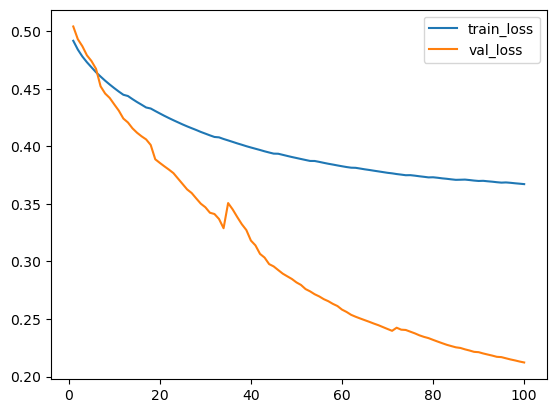

In [43]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="val_loss")
plt.legend()

In [44]:
history.history['val_loss']

[0.5041224360466003,
 0.4930729269981384,
 0.4869420826435089,
 0.47905439138412476,
 0.47408899664878845,
 0.4672906696796417,
 0.45213329792022705,
 0.44587981700897217,
 0.4420442283153534,
 0.43644171953201294,
 0.43100279569625854,
 0.42413759231567383,
 0.420754075050354,
 0.4156495928764343,
 0.41183680295944214,
 0.4087114930152893,
 0.4060259163379669,
 0.40120384097099304,
 0.3887729346752167,
 0.38564395904541016,
 0.38266468048095703,
 0.37979933619499207,
 0.37671342492103577,
 0.3719957768917084,
 0.3673032224178314,
 0.3625915050506592,
 0.3594500422477722,
 0.3547561764717102,
 0.350210040807724,
 0.34711065888404846,
 0.34235531091690063,
 0.341227263212204,
 0.33690714836120605,
 0.3288794755935669,
 0.3507393002510071,
 0.34520795941352844,
 0.3386308550834656,
 0.33240485191345215,
 0.3273000419139862,
 0.3181772828102112,
 0.3139723837375641,
 0.3066054880619049,
 0.30339765548706055,
 0.297727108001709,
 0.29570823907852173,
 0.29253461956977844,
 0.28942218422889

In [45]:
predicted=fmodel.predict(x_test)

1/1 [==============================] - 0s 120ms/step


In [46]:
predicted=np.where(predicted>0.5,1,0)

In [47]:
accuracy_score(y_test,predicted)

1.0

In [48]:
confusion_matrix(y_test,predicted)

array([[6, 0],
       [0, 4]], dtype=int64)

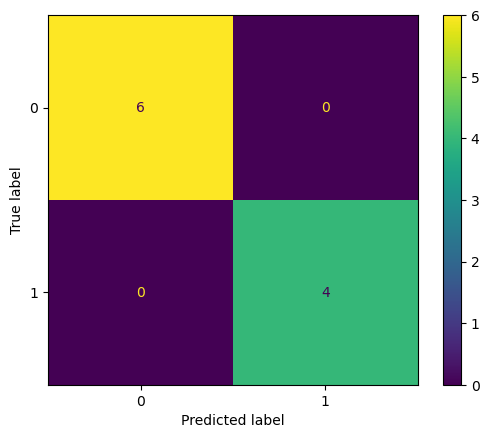

In [49]:

cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

9600/9600 [==============================] - 34s 4ms/step


<AxesSubplot:>

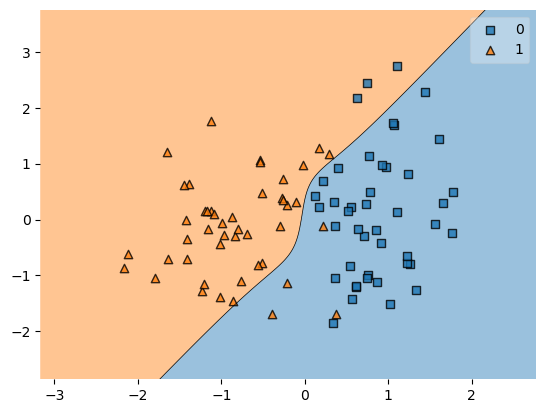

In [50]:
y_train_int = y_train.values.astype(int)
plot_decision_regions(x_trainp, y_train_int, clf=fmodel)

In [51]:
y_test_int = y_test.values.astype(int)

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot:>

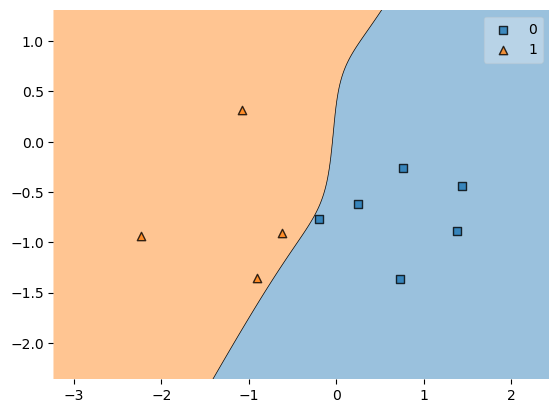

In [52]:

plot_decision_regions(x_testp,y_test_int,clf=fmodel)